# 🛒 Supermarket Sales EDA Project
### Author: [SHAIBAJ SHAIKH]
This project explores supermarket sales data to find insights into branch performance, product popularity, gender-based spending, and overall trends.


In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')



In [35]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\supermarket_sales.csv") 
df.head()



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


## 🔍 Data Overview

In [21]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## 🧹 Data Cleaning

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,March,Friday
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday


## 📊 Univariate Analysis

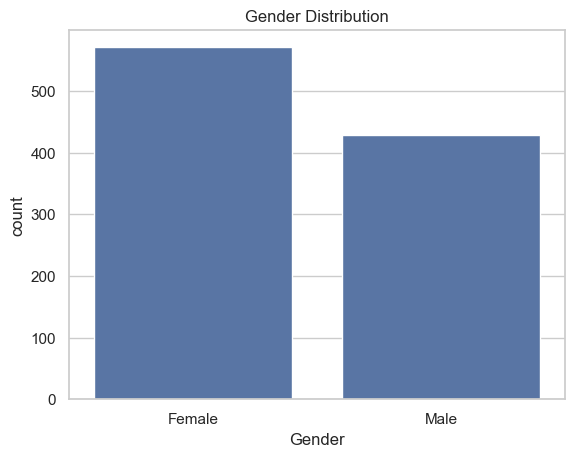

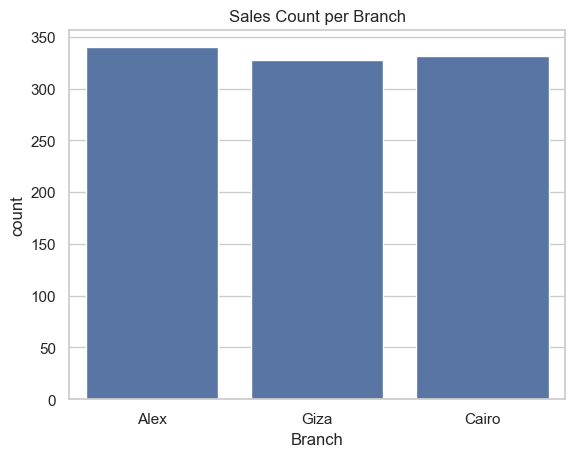

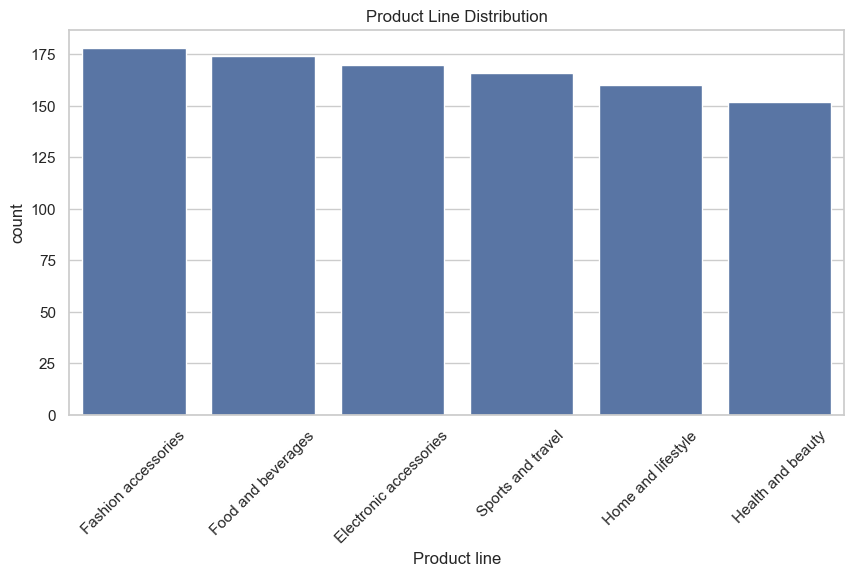

In [23]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Branch', data=df)
plt.title('Sales Count per Branch')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Product line', data=df, order=df['Product line'].value_counts().index)
plt.title('Product Line Distribution')
plt.xticks(rotation=45)
plt.show()

## 🔗 Bivariate Analysis

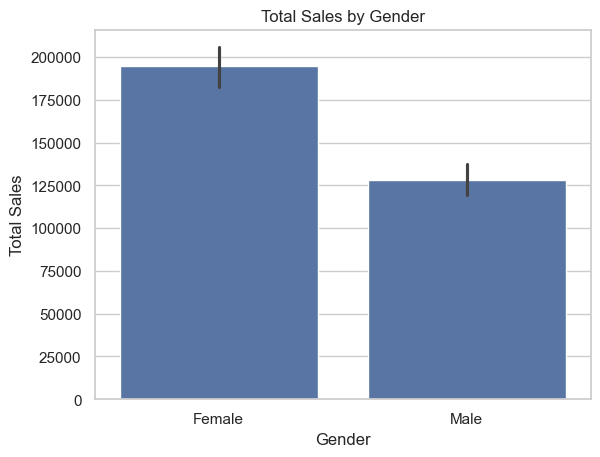

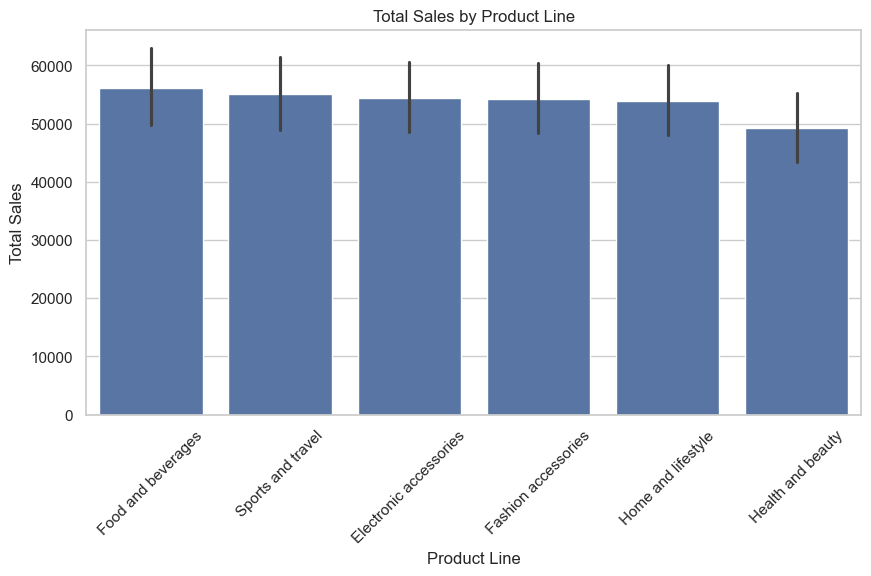

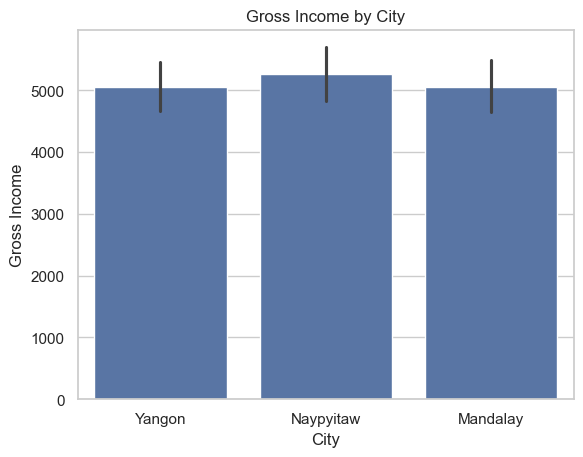

In [29]:

# ===============================
# 1️⃣ Total Sales by Gender
# ===============================
sns.barplot(x='Gender', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

# ===============================
# 2️⃣ Total Sales by Product Line
# ===============================
plt.figure(figsize=(10,5))
sns.barplot(
    x='Product line',
    y='Sales',
    data=df,
    estimator=sum,
    order=df.groupby('Product line')['Sales'].sum().sort_values(ascending=False).index
)
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# ===============================
# 3️⃣ Gross Income by City
# ===============================
sns.barplot(x='City', y='gross income', data=df, estimator=sum)
plt.title('Gross Income by City')
plt.xlabel('City')
plt.ylabel('Gross Income')
plt.show()


## 🔥 Correlation Heatmap

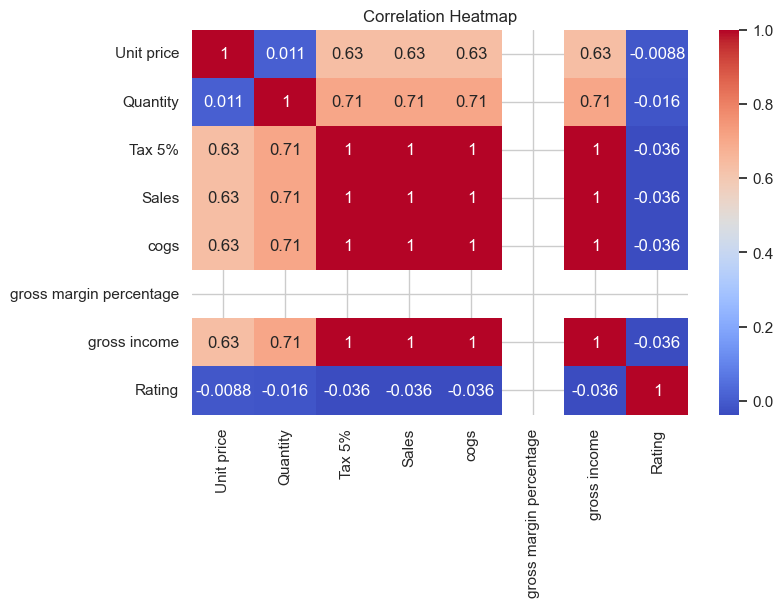

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## ⏳ Time-Based Analysis

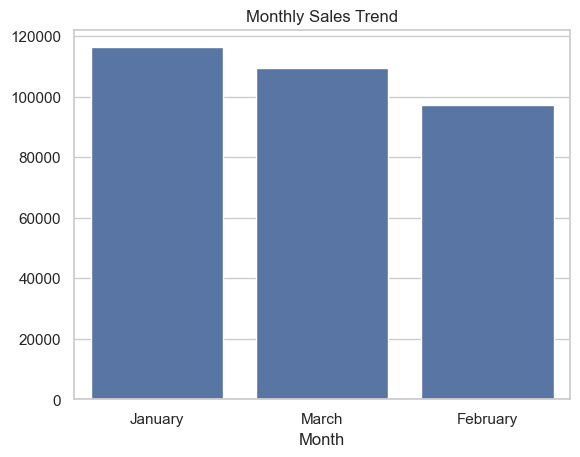

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.show()


## 🧠 Insights Summary
- Branch C has the highest total sales.
- Female customers spent slightly more on average.
- Food and Beverages and Fashion Accessories are top-selling categories.
- E-wallet is the most common payment method.
- Sales peaked in January.